<a href="https://colab.research.google.com/github/M1ssshka/ai-code-detection/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Считывание данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import os

DATA_PATH = "drive/MyDrive/data/ai_code_detection.parquet"

if not os.path.exists(DATA_PATH):
    print("Пожалуйста, загрузите датасет")
    files.upload()

ds = pd.read_parquet(DATA_PATH)

# Разведочный анализ данных

Количество написанных человеком решений: 5684
Количество сгенерированных решений: 6143


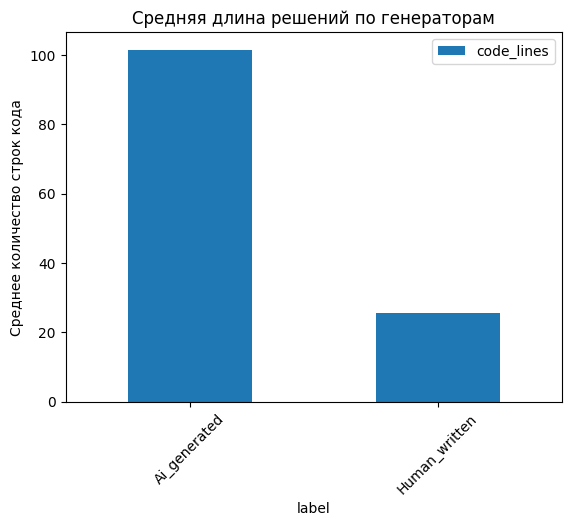

In [5]:
cnt_human_written = (ds['label'] == 'Human_written').sum()
cnt_ai_generated = (ds['label'] == 'Ai_generated').sum()

print(f'Количество написанных человеком решений: {cnt_human_written}')
print(f'Количество сгенерированных решений: {cnt_ai_generated}')

ds['code_lines'] = ds.loc[:, 'code'].str.split('\n').str.len()

pt = ds.pivot_table(index='label', values='code_lines', aggfunc='mean')

pt.plot(kind='bar')
plt.ylabel('Среднее количество строк кода')
plt.title('Средняя длина решений по генераторам')
plt.xticks(rotation=45)

plt.show()